# from itertools import product / pairwise / grouped
# min/max(str1, str2)

ein target zur prüfung wählen, den rest des dicts (sample) als gegenprüfung iterieren

kürzeres(target, test) über längeres(target, test) mappen
-> in welcher position sind die meisten übereinstimmungen?
besitzen
besitzt
11111100

viele übereinstimmende positionen (vergleich mit vorigen itersteps?) -> der rest ist morphem

maps mit der größten summe = matching lexeme, oder gültige affixe wenn am wortrand

In [1]:
from src import text_utilities as tu
wordset = tu.from_path('./data/experiment/verbs')

verb_dict = tu.count_syllables(wordset)
verb_dict.keys()
for i in range(1,9): # von mächtigster menge absteigend morpheme analysieren
    print(i, len(verb_dict[i]))

1 5010
2 27261
3 30123
4 14810
5 4455
6 1005
7 193
8 32


Tokenizer-Vokabular anhand des Token-Vokabulars erstellen:

In [23]:
verb_dict[3]

{'repliziert',
 'flösse ab',
 'willst herein',
 'komm rüber',
 'schaltet an',
 'steure zu',
 'schüfe nach',
 'halte mit',
 'verschlankte',
 'krüppelte',
 'verseifte',
 'durchschlitter',
 'sieh zurück',
 'wiege aus',
 'schlampampe',
 'anhinbätz',
 'lebe aus',
 'veräppelt',
 'sondert ab',
 'gewartet',
 'geht herum',
 'spendel an',
 'berieselst',
 'nibbelt ab',
 'säte aus',
 'umschwärme',
 'belaufen',
 'wedelst zu',
 'raube aus',
 'alteriert',
 'heimgeführt',
 'oxidier',
 'forderst an',
 'schalte weg',
 'beömmelte',
 'kampierte',
 'nötige',
 'verästle',
 'würgte aus',
 'trittst über',
 'wendest um',
 'klargestellt',
 'tagträume',
 'preise aus',
 'schädig vor',
 'vorbeidrück',
 'begabte',
 'legte auf',
 'pinselt ein',
 'bequem an',
 'mordet hin',
 'vernommen',
 'plante ein',
 'getrottet',
 'münde ein',
 'zurücktreib',
 'befieder',
 'turtelte',
 'verschreie',
 'griffe ab',
 'bestreifte',
 'äße mit',
 'verstätest',
 'rausgehört',
 'verwertet',
 'übernimm',
 'umhergeirrt',
 'denkt zurück',
 '

In [2]:
"""mapping 1010101 comparing words left and right"""
# durch key
maps = []
target = "herbeiführen"
l = len(target)
cnt = 0
cc1=0
cc2=0
cc3=0
for v in verb_dict[1]:
    pair = (v, target)
    case = tu.match_ends(v, target)
    smaller = min(pair, key=len)
    longer = max(pair, key=len)
    diff = len(longer) - len(smaller)


    if case.get("any"):
        cnt+=1
        if diff:

            if case.get("first"):
                cc1+=1
                m = []
                for i in range(len(smaller)):
                    m.append(1 if smaller[i] == longer[i] else 0)
                while len(m) < l:
                    m.append(0) # padding
                maps.append(m)


            if case.get("last"):
                m = []
                cc2+=1
                for i in range(len(smaller)):
                    m.append(1 if smaller[i] == longer[i+diff] else 0)
                while len(m) < l:
                    m.insert(0, 0) # padding
                maps.append(m)


        else:
            cc3+=1
            m = []
            for i in range(l):
                    m.append(1 if pair[0][i] == pair[1][i] else 0)
            maps.append(m)

print(cc1, cc2, cc3)

938 2108 1120


In [3]:
# Summe aller gleichlangen maps untereinander, bildet nur Tendenz ab
#itertools recipes
new_maps = [x for x in maps if len(x)==len(target)]
sum_new_maps = [sum(x) for x in zip(*new_maps)]
sum_new_maps

[1230, 373, 424, 320, 1423, 3135]

Text(0, 0.5, 'frequency')

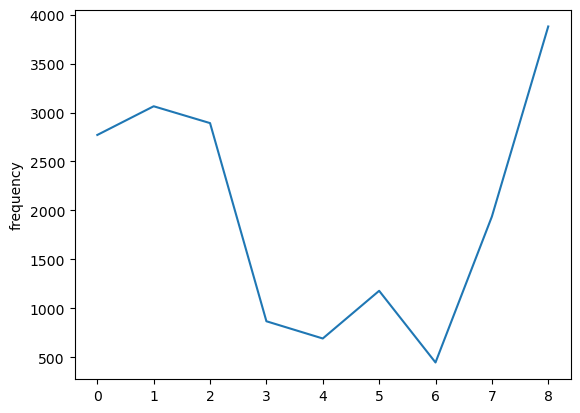

In [5]:
# konvertiere map in string, nur vorübergehend?
str_maps = []
for m in maps:
    mstr = ""
    for i in m:
        mstr += str(i)
    str_maps.append(mstr)
print(str_maps[:10], len(str_maps))

['000000101', '000000001', '000000011', '000001001', '000100101', '101000010', '111000000', '111000011', '100000000', '000000001'] 6517


In [8]:
unique_maps = set(str_maps)
# maps zu klein: padding links oder rechts
# maps zählen
# softmax der zählungen
# maximum coverage der map 111000000 + 000000011 + ##0000011 + 000111100 = <verstehen> (111111111)
"""
finde die summe von stringmaps, bei denen der count maximiert ist
"""

In [7]:
'000110000' in str_maps

False

In [6]:
import collections as cl
n_maps = cl.Counter(str_maps).most_common(50)
n_maps[:50]

[('000000001', 1311),
 ('111000000', 972),
 ('111000010', 663),
 ('000000011', 505),
 ('000001001', 433),
 ('111100000', 310),
 ('000011001', 183),
 ('010000001', 166),
 ('000000101', 154),
 ('000010001', 126),
 ('111001000', 119),
 ('000001011', 113),
 ('101000000', 110),
 ('111100010', 96),
 ('010000011', 76),
 ('111110000', 64),
 ('111000100', 60),
 ('111000011', 58),
 ('000000111', 58),
 ('000110001', 56),
 ('011000011', 53),
 ('111001010', 42),
 ('010110001', 37),
 ('011110001', 35),
 ('100000010', 29),
 ('000100001', 29),
 ('001000001', 28),
 ('000100011', 27),
 ('010011001', 26),
 ('010000101', 25),
 ('100000000', 24),
 ('010001001', 23),
 ('101000010', 22),
 ('000111001', 22),
 ('000101001', 22),
 ('000001111', 21),
 ('001001001', 20),
 ('011000001', 20),
 ('001011001', 20),
 ('111111000', 20),
 ('000010101', 18),
 ('111000110', 16),
 ('000111111', 14),
 ('111100001', 14),
 ('010001011', 11),
 ('111100011', 11),
 ('111001011', 10),
 ('100001000', 10),
 ('010010001', 9),
 ('1010

In [8]:
# neue maps ignorieren unterschiede im wortinneren
import regex as re
recount_map = []
for cnt in n_maps:
    sr = re.sub(pattern='(01+0)', repl=lambda m: len(m.group(1))*"0",string=cnt[0])
    recount_map.append([sr, cnt[1]])

recount_map

[['000000001', 1311],
 ['111000000', 972],
 ['111000000', 663],
 ['000000011', 505],
 ['000000001', 433],
 ['111100000', 310],
 ['000000001', 183],
 ['000000001', 166],
 ['000000001', 154],
 ['000000001', 126],
 ['111000000', 119],
 ['000000011', 113],
 ['100000000', 110],
 ['111100000', 96],
 ['000000011', 76],
 ['111110000', 64],
 ['111000000', 60],
 ['000000111', 58],
 ['111000011', 58],
 ['000000001', 56],
 ['000000011', 53],
 ['111000010', 42],
 ['000110001', 37],
 ['000000001', 35],
 ['000000001', 29],
 ['100000000', 29],
 ['000000001', 28],
 ['000000011', 27],
 ['000000001', 26],
 ['000000001', 25],
 ['100000000', 24],
 ['000000001', 23],
 ['100000000', 22],
 ['000000001', 22],
 ['000001001', 22],
 ['000001111', 21],
 ['000000001', 20],
 ['000000001', 20],
 ['111111000', 20],
 ['000011001', 20],
 ['000000101', 18],
 ['111000000', 16],
 ['111100001', 14],
 ['000111111', 14],
 ['000000011', 11],
 ['111100011', 11],
 ['100000000', 10],
 ['111000011', 10],
 ['000000001', 9],
 ['1000

In [9]:
# add up identical counts
print(len(recount_map))

rd = dict()
for i in list(recount_map):
    if i[0] not in rd:
        rd[i[0]] = i[1]
    else:
        rd[i[0]] += i[1]

print(len(rd), rd)

50
19 {'000000001': 2666, '111000000': 1830, '000000011': 785, '111100000': 406, '100000000': 195, '111110000': 64, '000000111': 58, '111000011': 68, '111000010': 42, '000110001': 37, '000001001': 22, '000001111': 21, '111111000': 20, '000011001': 20, '000000101': 18, '111100001': 14, '000111111': 14, '111100011': 11, '100000001': 9}


In [32]:

sorted_maps = sorted(recount_map, key=lambda t: t[0])
sorted_maps

[['000000001', 15],
 ['000000011', 334],
 ['000000011', 17],
 ['000000011', 16],
 ['000000011', 8],
 ['000000111', 34],
 ['000001111', 143],
 ['000001111', 10],
 ['000001111', 9],
 ['000011111', 5],
 ['100000000', 115],
 ['100000000', 9],
 ['100000000', 7],
 ['100000011', 9],
 ['110000000', 12]]

In [42]:
def combine_counts(m: list, n: list):
    """Compares two maps e.g.['1100000', 46] vs. ['1000000', 29]. Sums count if (m in n) or vice versa and has equal number of 1s. Map must be str(int), count must be int."""
    mc = m[0]
    nc = n[0]
    long = max(mc, nc, key=len)
    short = min(mc, nc, key=len)
    if nc.count('1') == mc.count('1') and short in long:
        # short & long behalten
        # m, n entfernen
        return [long, sum([m[1], n[1]])]
    else:
        return None

In [39]:
import itertools as it
for m, n in set(it.combinations(recount_map, 2)):
    print(m, n)

#def pairwise(iterable):
#    "s -> (s0, s1), (s2, s3), (s4, s5), ..."
#    a = iter(iterable)
#    return zip(a, a)

left = [x for x in recount_map if x[0].startswith("1") and x[0].endswith("0")]
right = [x for x in recount_map if x[0].startswith("0") and x[0].endswith("1")]
circ = [x for x in recount_map if x[0].startswith("1") and x[0].endswith("1")]

print(left, right, circ)

TypeError: unhashable type: 'list'

In [44]:
def map_subword(target: str, map:str) -> str:
    """Returns a subword from a target string and a map. Yet to implement maps with 1 on both ends."""
    if map.startswith("1"):
        return target[:map.count("1")]+"##"
    elif map.endswith("1"):
        return "##"+target[-map.count("1"):]
print(map_subword("verstehen", "000000011"))

##en


In [40]:
"verstehen".partition("steh")

('ver', 'steh', 'en')

In [ ]:
"ver##"